In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
strClin = "data/clinicaltrial_data.csv"
strMouse = "data/mouse_drug_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
dfClin = pd.read_csv(strClin)
dfMouse = pd.read_csv(strMouse)

# Combine the data into a single dataset
dfMrg = pd.merge(dfClin, dfMouse, on='Mouse ID')

# Display the data table for preview
dfMrg.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grpByDT = dfMrg.groupby(['Drug','Timepoint'])

# Convert to DataFrame
dfTVMean = grpByDT.mean()
dfTVMean = dfTVMean['Tumor Volume (mm3)']
dfTVMean = dfTVMean.reset_index()

# Preview DataFrame
dfTVMean.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
dfTVSErr = grpByDT.sem()
dfTVSErr = dfTVSErr['Tumor Volume (mm3)']
dfTVSErr = dfTVSErr.reset_index()

# Preview DataFrame
dfTVSErr.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Minor Data Munging to Re-Format the Data Frames
dfTVMean = pd.crosstab(dfTVMean['Timepoint'], dfTVMean['Drug'], \
                       values=dfTVMean['Tumor Volume (mm3)'], aggfunc='mean')

# Preview that Reformatting worked
dfTVMean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Minor Data Munging to Re-Format the Data Frames
dfTVSErr = pd.crosstab(dfTVSErr['Timepoint'], dfTVSErr['Drug'], \
                       values=dfTVSErr['Tumor Volume (mm3)'], aggfunc='mean')

# Preview that Reformatting worked
dfTVSErr

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
intMaxTP = max(dfTVMean.index)
intMaxTP

45

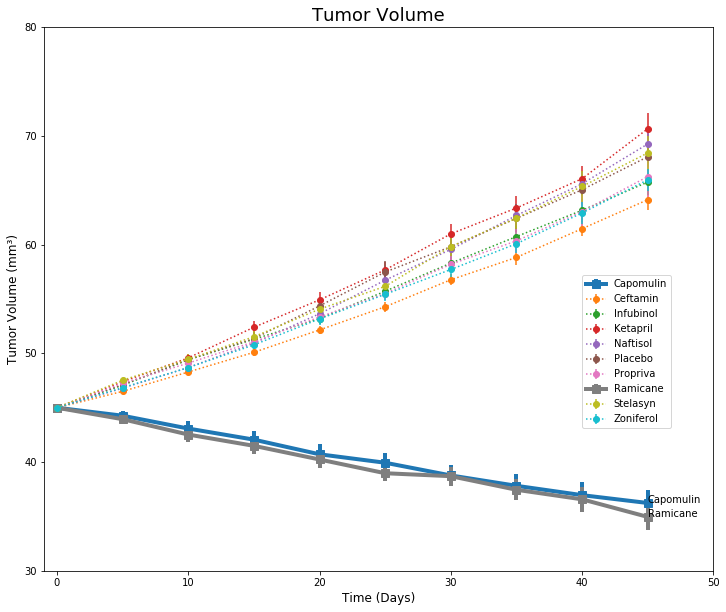

In [7]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
for col in dfTVMean.columns:
    if dfTVMean[col][0] > dfTVMean[col][intMaxTP]:
        ax.errorbar(dfTVMean.index, dfTVMean[col], dfTVSErr[col], \
                    fmt="s", linestyle='solid', linewidth=4, label=col, \
                    markersize=8)
        plt.annotate(s=col, xy=(intMaxTP, dfTVMean[col].loc[intMaxTP]))
    else:
        ax.errorbar(dfTVMean.index, dfTVMean[col], dfTVSErr[col], \
                    fmt="o", linestyle='dotted', label=col)
        
ax.set_title('Tumor Volume', fontdict={'fontsize':18})
ax.set_xlabel("Time (Days)", fontdict={'fontsize':12})
ax.set_ylabel("Tumor Volume (mm³)", fontdict={'fontsize':12})
ax.set_xlim(-1, 50)      # set subjectively
ax.set_ylim(30, 80)      # set subjectively
fig.legend(loc=(.8, .3)) # set subjectively
    
fig = plt.gcf()
fig.set_size_inches(12, 10)
# Save the Figure
plt.savefig("Pymaceuticals01-Tumor Volume.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
dfMSMean = grpByDT.mean()

# Convert to DataFrame
dfMSMean = dfMSMean['Metastatic Sites']
dfMSMean = dfMSMean.reset_index()

# Preview DataFrame
dfMSMean.head(20)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
dfMSSErr = grpByDT.sem()

# Convert to DataFrame
dfMSSErr = dfMSSErr['Metastatic Sites']
dfMSSErr = dfMSSErr.reset_index()

# Preview DataFrame
dfMSSErr.head(20)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [10]:
# Minor Data Munging to Re-Format the Data Frames
dfMSMean = pd.crosstab(dfMSMean['Timepoint'], dfMSMean['Drug'], \
                       values=dfMSMean['Metastatic Sites'], aggfunc='mean')

# Preview that Reformatting worked
dfMSMean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
# Minor Data Munging to Re-Format the Data Frames
dfMSSErr = pd.crosstab(dfMSSErr['Timepoint'], dfMSSErr['Drug'], \
                       values=dfMSSErr['Metastatic Sites'], aggfunc='mean')

# Preview that Reformatting worked
dfMSSErr

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [12]:
fltMeanMS = dfMSMean.loc[intMaxTP].mean()
fltMeanMS

2.4074564324564327

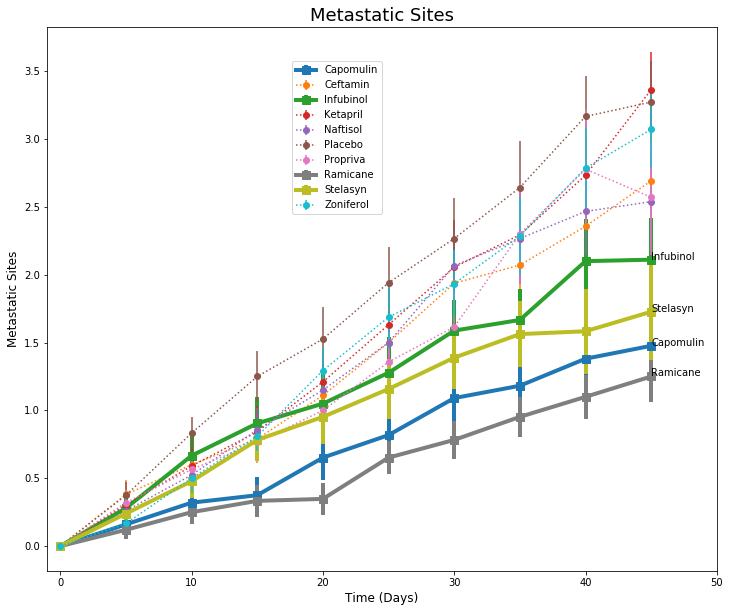

In [13]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
for col in dfMSMean.columns:
    if dfMSMean[col][intMaxTP] < fltMeanMS:
        ax.errorbar(dfMSMean.index, dfMSMean[col], dfMSSErr[col], \
                    fmt="s", linestyle='solid', linewidth=4, label=col, \
                    markersize=8)
        plt.annotate(s=col, xy=(intMaxTP, dfMSMean[col].loc[intMaxTP]))
    else:
        ax.errorbar(dfMSMean.index, dfMSMean[col], dfMSSErr[col], \
                    fmt="o", linestyle='dotted', label=col)
        
ax.set_title('Metastatic Sites', fontdict={'fontsize':18})
ax.set_xlabel('Time (Days)', fontdict={'fontsize':12})
ax.set_ylabel('Metastatic Sites', fontdict={'fontsize':12})
ax.set_xlim(-1, 50)       # set subjectively
fig.legend(loc=(.4, .65)) # set subjectively
    
fig = plt.gcf()
fig.set_size_inches(12, 10)
# Save the Figure
plt.savefig("Pymaceuticals02-Metastatic Sites.png")

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [16]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [18]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()